In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Font modification
#plt.rcParams['font.sans-serif'] = "Times New Roman"
#plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 18

In [3]:
results = pd.DataFrame()
for file in [f for f in os.listdir('../data/') if f.startswith('res_') and f.endswith('.csv')]:
    df = pd.read_csv('../data/{}'.format(file), index_col=[0])
    results = pd.concat([results, df], axis=0, sort=False)
    
results['savgol__window_length'] = results['savgol__window_length']+1
results.fillna('NA', inplace=True)


#results.drop(['RMSE opt-rmse', 'R2 opt-rmse'], axis=1, inplace=True)
#results.rename(columns={'RMSE opt-r2':'RMSE', 'R2 opt-r2':'R2'}, inplace=True)
results.sort_values('RMSE test', inplace=True)
results.T

,elnet,SVM
alpha,0.00794328,NA
l1_ratio,0.20008,NA
pca__n_components,29,30
savgol__deriv,2,2
savgol__polyorder,2,2
savgol__wavemax,1438,1348
savgol__wavemin,1026,1030
savgol__window_length,13,13
RMSE train,4.31176,4.30365
R2 train,0.757773,0.758683


# scores

In [4]:
# Sorted by RMSE
results[['RMSE test', 'RMSE train', 'R2 test', 'R2 train']]

,RMSE test,RMSE train,R2 test,R2 train
elnet,4.505883,4.311760,0.725458,0.757773
SVM,4.838770,4.303649,0.683395,0.758683


In [5]:
# PCA
#results[['pca__n_components']]

In [6]:
# Savgol
results[[col for col in results.columns if col.startswith('savgol_')]]

,savgol__deriv,savgol__polyorder,savgol__wavemax,savgol__wavemin,savgol__window_length
elnet,2.0,2.0,1438.0,1026.0,13.0
SVM,2.0,2.0,1348.0,1030.0,13.0


In [7]:
# Accuracy
df = results[[col for col in results.columns if col.startswith('preds')]]
df = df*100
df

,preds +/-1,preds +/-2,preds +/-3,preds +/-4,preds +/-6,preds +/-8,preds +/-10
elnet,17.010309,32.989691,48.969072,64.432990,82.474227,91.752577,96.391753
SVM,19.587629,32.474227,50.000000,63.402062,81.958763,89.690722,95.360825


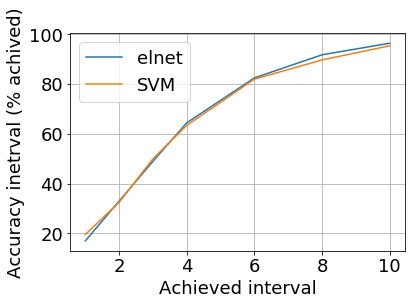

In [8]:

for acc in df.index:
    plt.plot([1,2,3,4,6,8,10], df.loc[acc].values, label=acc)
    #print(df.loc[acc].values)

plt.ylabel('Accuracy inetrval (% achived)')
plt.xlabel('Achieved interval')
plt.grid()
plt.legend()
plt.savefig('results - interval.png', bbox_inches = 'tight')
plt.show()

# Regularization

In [9]:
results[['alpha', 'l1_ratio', 'C', 'epsilon']]

,alpha,l1_ratio,C,epsilon
elnet,0.00794328,0.20008,NA,NA
SVM,NA,NA,3.16228,1.58489


# PCA LVM analysis

In [10]:
results = pd.DataFrame()
for file in [f for f in os.listdir('../data/') if f.endswith('analysis.csv')]:
    df = pd.read_csv('../data/{}'.format(file), index_col=[0]).T
    df.index.name='PCA comp'
    df.reset_index(inplace=True)
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='ignore')
    regsys = pd.DataFrame({'reg':[file.split('_')[0] for x in range(df.shape[0])]})
    df=pd.concat([df, regsys],axis=1)
    
    results = pd.concat([results, df],sort=True)
    
results.fillna('NA', inplace=True)
results

,C,PCA comp,R2 CV train,R2 test,RMSE CV train,RMSE test,SNV,alpha,epsilon,kernel,l1_ratio,log1op,reg,savgol,savgol__deriv,savgol__polyorder,savgol__window_length,trimmer__wavemax,trimmer__wavemin
0,NA,5,0.619048,0.683526,5.287614,5.043477,False,0.833079,NA,NA,0.975395,True,elnet,True,2.0,3.0,16.0,1350.0,1164.0
1,NA,8,0.686067,0.702964,4.800023,4.886138,False,0.110907,NA,NA,0.6065,False,elnet,True,2.0,3.0,8.0,1342.0,1034.0
2,NA,10,0.693264,0.733759,4.744683,4.625922,False,0.111846,NA,NA,0.906618,True,elnet,True,1.0,3.0,10.0,1352.0,962.0
3,NA,15,0.724300,0.729051,4.498239,4.666649,False,0.0832436,NA,NA,0.526527,False,elnet,True,2.0,2.0,10.0,1358.0,1032.0
0,0.996707,5,0.613969,0.669985,5.322748,5.150245,False,NA,1.04486,linear,NA,True,SVR,True,2.0,3.0,16.0,1344.0,1166.0
1,3.12846,8,0.676817,0.738121,4.870219,4.587870,False,NA,4.393,linear,NA,True,SVR,True,1.0,3.0,16.0,1348.0,1012.0
2,1.9581,10,0.694681,0.711102,4.733708,4.818738,False,NA,0.226545,linear,NA,True,SVR,True,2.0,3.0,10.0,1420.0,1168.0
3,0.979031,15,0.722277,0.722771,4.514718,4.720416,False,NA,3.86235,linear,NA,False,SVR,True,2.0,3.0,10.0,1350.0,1034.0


In [11]:
subset = results[['PCA comp', 'reg', 'RMSE CV train', 'RMSE test', 'R2 CV train', 'R2 test']]

subset = subset.melt(['reg', 'PCA comp'])
subset['serie'] = subset['variable'].apply(lambda x: 'Train' if x.endswith('train') else 'Validation')
subset['score'] = subset['variable'].apply(lambda x: 'RMSE' if x.startswith('RMSE') else 'R2')
subset.drop('variable', inplace=True, axis=1)
subset#.groupby(['PCA comp','reg', 'serie', 'score']).mean()

,reg,PCA comp,value,serie,score
0,elnet,5,5.287614,Train,RMSE
1,elnet,8,4.800023,Train,RMSE
2,elnet,10,4.744683,Train,RMSE
3,elnet,15,4.498239,Train,RMSE
4,SVR,5,5.322748,Train,RMSE
5,SVR,8,4.870219,Train,RMSE
6,SVR,10,4.733708,Train,RMSE
7,SVR,15,4.514718,Train,RMSE
8,elnet,5,5.043477,Validation,RMSE
9,elnet,8,4.886138,Validation,RMSE


In [12]:
import seaborn as sns
#sns.catplot(x="PCA comp", y="RMSE", hue="reg", data=subset, height=6, kind="bar")

/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


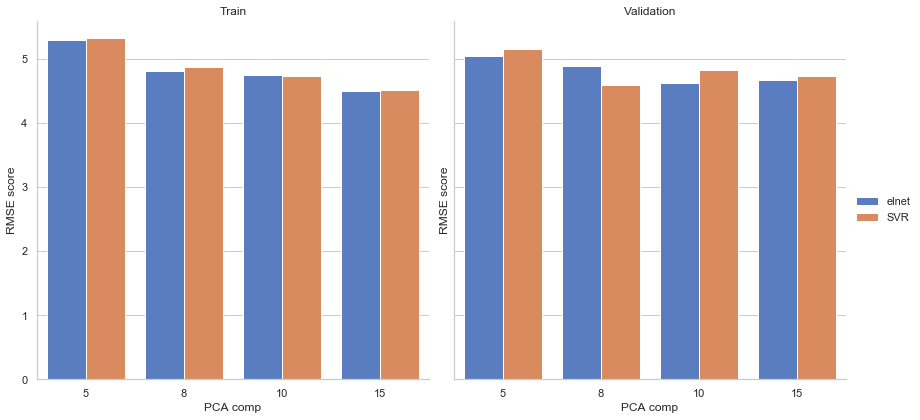

In [13]:
#sns.FacetGrid(subset, col='reg', row='serie')
sns.set(style="whitegrid")
g = sns.FacetGrid(subset[subset['score'] == 'RMSE'], col="serie", height = 6)
g = g.map(sns.barplot, 'PCA comp', 'value', 'reg', palette='muted', ).add_legend().set_titles('{col_name}').set(ylabel='RMSE score')

plt.savefig('results - RMSE comp.png', bbox_inches = 'tight')
plt.show()

/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


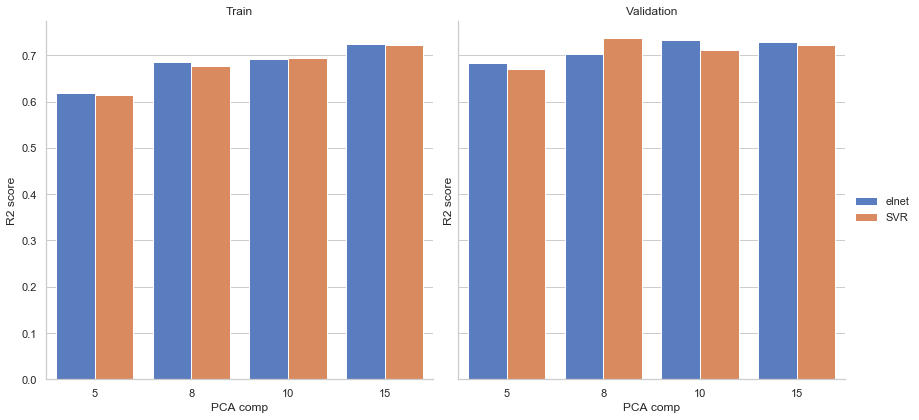

In [14]:
#sns.FacetGrid(subset, col='reg', row='serie')
g = sns.FacetGrid(subset[subset['score'] == 'R2'], col="serie", height = 6)
g = g.map(sns.barplot, 'PCA comp', 'value', 'reg', palette='muted').add_legend().set_titles('{col_name}').set(ylabel='R2 score')

plt.savefig('results - R2 comp.png', bbox_inches = 'tight')
plt.show()

/Users/cricket/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


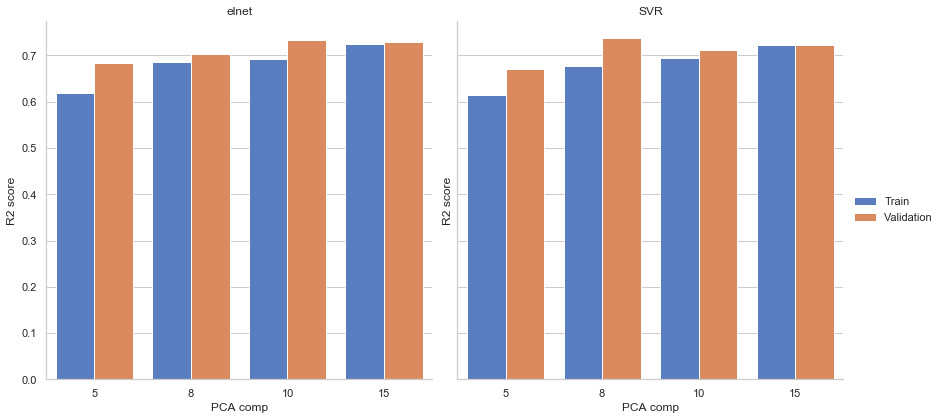

In [16]:
#sns.FacetGrid(subset, col='reg', row='serie')
g = sns.FacetGrid(subset[subset['score'] == 'R2'], col="reg", height = 6)
g = g.map(sns.barplot, 'PCA comp', 'value', 'serie', palette='muted', hue_order=['Train', 'Validation']).add_legend().set_titles('{col_name}').set(ylabel='R2 score')

plt.show()